In [1]:
# Checking current path
import os
os.getcwd()

'C:\\Users\\Siegfried Vieluf\\Desktop\\Finance BootCamp\\Python_Pandas\\pandas-homework'

In [2]:
# Initialzing all tools that I may need
import pathlib as Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# Setting up the paths to the CSVs
algo_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/algo_returns.csv')
whale_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/whale_returns.csv')
sp500_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/sp500_history.csv')

In [4]:
# Creating dataframes 
algo_df = pd.read_csv(algo_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
whale_df = pd.read_csv(whale_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
sp500_df = pd.read_csv(sp500_data,index_col='Date',infer_datetime_format=True,parse_dates=True)


In [5]:
# sampling dataframes
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
whale_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2016-11-21,0.002668,0.005355,0.012122,0.002315
2019-04-29,0.001254,0.002719,0.006251,0.005223
2017-07-12,0.008579,0.009610,0.010821,0.013334
2018-07-25,-0.001095,0.003551,0.003487,0.020241
2017-12-06,-0.009194,-0.004718,0.001970,0.018509


In [7]:
sp500_df.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [8]:
#Sorting the dates in all dataframes
sp500_df.sort_index(ascending=True,inplace=True)
algo_df.sort_index(ascending=True,inplace=True)
whale_df.sort_index(ascending=True,inplace=True)

In [9]:
# veiwing if there is any null values
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [10]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [11]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [12]:
# dropping null values
algo_df.dropna(inplace=True)
whale_df.dropna(inplace=True)

In [13]:
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [14]:
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [15]:
# Converting $ currency format to float
sp500_df['Close']=sp500_df['Close'].str.replace("$","")
sp500_df['Close']=sp500_df['Close'].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [16]:
sp500_df_returns=sp500_df.pct_change().dropna()

In [17]:
# changed the name of the S&P 500 returns dataframe to compare to the other dataf
sp500_df_returns=sp500_df_returns.rename(columns={'Close':'S&P 500'})
sp500_df_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
#combining all dataframes
combined_df=pd.concat([algo_df,whale_df,sp500_df_returns],axis='columns',join='inner')
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


<AxesSubplot:xlabel='Date'>

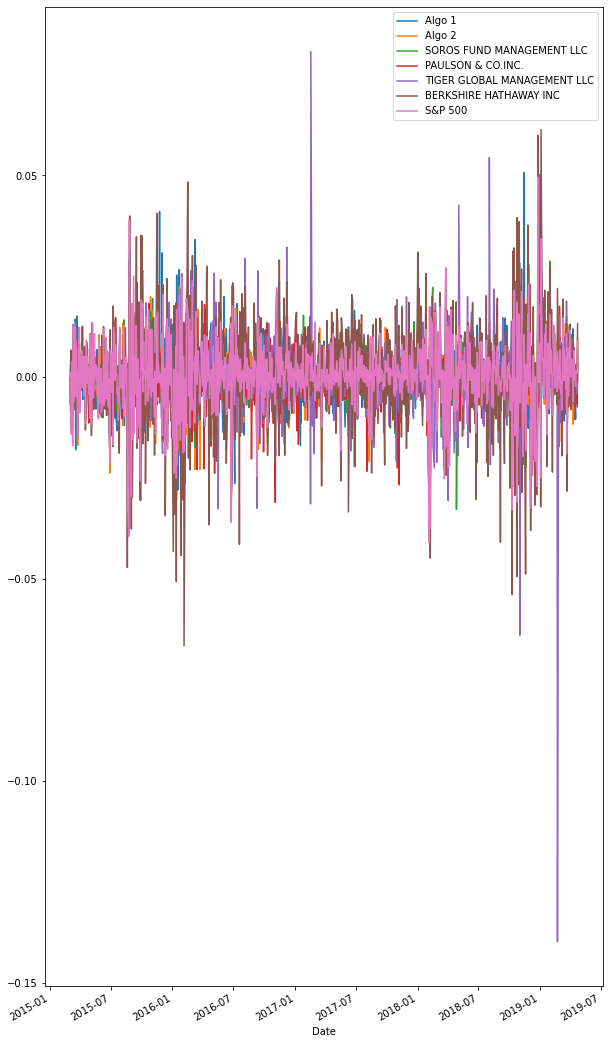

In [19]:
combined_df.plot(figsize=(10,20))